In [2]:
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics, preprocessing
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression

# import wandb
import random


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.0 COMPAS

In [ ]:
dfc = pd.read_csv("/content/drive/MyDrive/Project/WB_Output/wandb_compas_good.csv")


In [ ]:
dfc_trimmed = dfc[['alpha_0', 'alpha_1', 
                 'test_accuracy','test_loss', 'test_precision', 'test_recall', 
                 'train_accuracy','train_loss','train_precision', 'train_recall','train_dpd', 'train_edd', 
                 'val_accuracy', 'val_loss','val_precision', 'val_recall','val_dpd', 'val_edd']]

dfc_trimmed.columns = ['alpha_dp', 'alpha_eo', 
                      'test_accuracy','test_loss', 'test_precision', 'test_recall', 
                      'train_accuracy','train_loss','train_precision', 'train_recall','train_dpd', 'train_edd', 
                      'val_accuracy', 'val_loss','val_precision', 'val_recall','val_dpd', 'val_edd', ]

dfc_trimmed.head()


,alpha_dp,alpha_eo,test_accuracy,test_loss,test_precision,test_recall,train_accuracy,train_loss,train_precision,train_recall,train_dpd,train_edd,val_accuracy,val_loss,val_precision,val_recall,val_dpd,val_edd
0,200,200,0.458362,0.980097,1.0,0.458362,0.449792,1.120745,1.0,0.449792,0.0,0.0,0.441576,1.041194,1.0,0.441576,0.0,0.0
1,200,150,0.458362,0.964303,1.0,0.458362,0.449792,1.096996,1.0,0.449792,0.0,0.0,0.441576,1.029151,1.0,0.441576,0.0,0.0
2,200,100,0.458362,0.945304,1.0,0.458362,0.449792,1.070184,1.0,0.449792,0.0,0.0,0.441576,1.015492,1.0,0.441576,0.0,0.0
3,200,50,0.458362,0.921370,1.0,0.458362,0.449792,1.038620,1.0,0.449792,0.0,0.0,0.441576,0.999249,1.0,0.441576,0.0,0.0
4,200,40,0.458362,0.915736,1.0,0.458362,0.449792,1.031485,1.0,0.449792,0.0,0.0,0.441576,0.995545,1.0,0.441576,0.0,0.0


In [ ]:
dfc_train = dfc_trimmed[['alpha_dp', 'alpha_eo', 'train_accuracy','train_loss','train_precision', 'train_recall','train_dpd', 'train_edd']]
# df_test = ['alpha_dp', 'alpha_eo', 'test_accuracy','test_loss', 'test_precision', 'test_recall']
dfc_val = dfc_trimmed[['alpha_dp', 'alpha_eo', 'val_accuracy','val_loss','val_precision', 'val_recall','val_dpd', 'val_edd']]

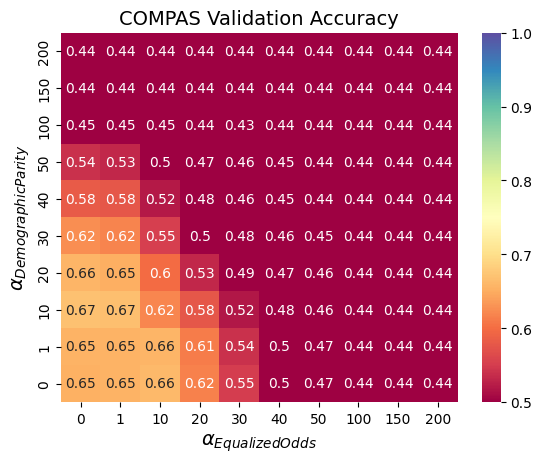

In [ ]:
dfc_val_acc = dfc_val.pivot(index='alpha_dp',columns='alpha_eo',values='val_accuracy')
dfc_val_acc = dfc_val_acc.sort_values(by='alpha_dp',ascending=False)
sns.heatmap(dfc_val_acc,vmin=0.5,vmax=1,annot=True,cmap="Spectral")
plt.xlabel(r"$\alpha_{Equalized Odds}$",fontsize=14)
plt.ylabel(r"$\alpha_{Demographic Parity}$",fontsize=14)
plt.title("COMPAS Validation Accuracy",fontsize=14)
plt.show()

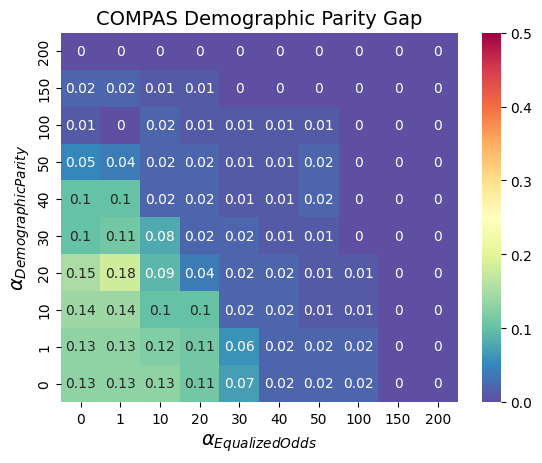

In [ ]:
dfc_val_dpd = dfc_val.pivot(index='alpha_dp',columns='alpha_eo',values='val_dpd')
dfc_val_dpd = dfc_val_dpd.sort_values(by='alpha_dp',ascending=False).round(2)
sns.heatmap(dfc_val_dpd,vmin=0,vmax=0.5,annot=True,cmap="Spectral_r")
plt.title("COMPAS Demographic Parity Gap",fontsize=14)
plt.xlabel(r"$\alpha_{Equalized Odds}$",fontsize=14)
plt.ylabel(r"$\alpha_{Demographic Parity}$",fontsize=14)
plt.show()

#min Loss + alpha(criterion)

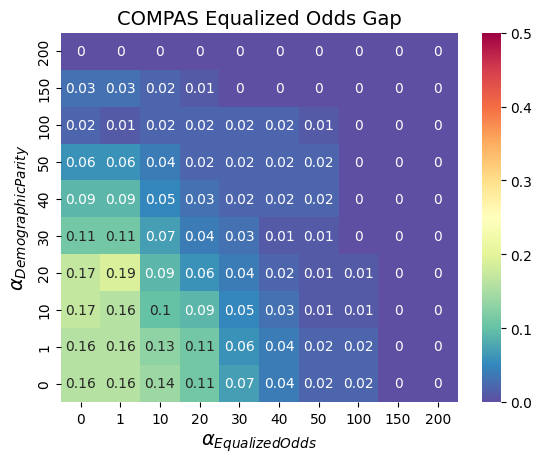

In [ ]:
dfc_val_eod = dfc_val.pivot(index='alpha_dp',columns='alpha_eo',values='val_edd')
dfc_val_eod = dfc_val_eod.sort_values(by='alpha_dp',ascending=False).round(2)
sns.heatmap(dfc_val_eod,vmin=0,vmax=0.5,annot=True,cmap="Spectral_r")
plt.title("COMPAS Equalized Odds Gap",fontsize=14)
plt.xlabel(r"$\alpha_{Equalized Odds}$",fontsize=14)
plt.ylabel(r"$\alpha_{Demographic Parity}$",fontsize=14)
plt.show()

## 2.0 Adult 

In [5]:
dfa = pd.read_csv("/content/drive/MyDrive/Project/WB_Output/wandb_adult.csv")

dfa.columns 

dfa_trimmed = dfa[['alpha_0', 'alpha_1', 
                 #'test_accuracy','test_loss', 'test_precision', 'test_recall', 
                 'train_accuracy','train_loss','train_precision', 'train_recall','train_dpd', 'train_edd', 
                 'val_accuracy', 'val_loss','val_precision', 'val_recall','val_dpd', 'val_edd']]

dfa_trimmed.columns = ['alpha_dp', 'alpha_eo', 
                      #'test_accuracy','test_loss', 'test_precision', 'test_recall', 
                      'train_accuracy','train_loss','train_precision', 'train_recall','train_dpd', 'train_edd', 
                      'val_accuracy', 'val_loss','val_precision', 'val_recall','val_dpd', 'val_edd', ]

#dfa_trimmed = dfa_trimmed.drop(64,axis=0) 

dfa_trimmed.head()


# dfa_trimmed.loc[(dfa_trimmed.alpha_dp==1000) & (dfa_trimmed.alpha_eo==1000),'val_accuracy'] = dfa_trimmed.loc[(dfa_trimmed.alpha_dp==100) & (dfa_trimmed.alpha_eo==100),'val_accuracy'].values[0]
# dfa_trimmed.loc[(dfa_trimmed.alpha_dp==1000) & (dfa_trimmed.alpha_eo==1000),'val_edd'] = dfa_trimmed.loc[(dfa_trimmed.alpha_dp==100) & (dfa_trimmed.alpha_eo==100),'val_edd'].values[0]
# dfa_trimmed.loc[(dfa_trimmed.alpha_dp==1000) & (dfa_trimmed.alpha_eo==1000),'val_dpd'] = dfa_trimmed.loc[(dfa_trimmed.alpha_dp==100) & (dfa_trimmed.alpha_eo==100),'val_dpd'].values[0]


,alpha_dp,alpha_eo,train_accuracy,train_loss,train_precision,train_recall,train_dpd,train_edd,val_accuracy,val_loss,val_precision,val_recall,val_dpd,val_edd
0,50,0,NaN,NaN,NaN,NaN,NaN,NaN,0.589744,7.712966,0.554939,0.662252,0.000715,0.105191
1,40,200,0.485652,7.642715,0.495933,0.898634,0.029767,0.022083,0.460288,7.868299,0.462759,0.888742,0.029767,0.022083
2,40,150,0.490389,7.613898,0.498496,0.893602,0.031459,0.023841,0.465291,7.857747,0.465181,0.884768,0.031459,0.023841
3,40,100,0.500410,7.576654,0.504092,0.885514,0.026893,0.029203,0.474672,7.841073,0.469880,0.878146,0.026893,0.029203
4,40,50,0.517537,7.519895,0.514565,0.850827,0.040539,0.058432,0.500313,7.808264,0.483232,0.839735,0.040539,0.058432


In [6]:
dfa_train = dfa_trimmed[['alpha_dp', 'alpha_eo', 'train_accuracy','train_loss','train_precision', 'train_recall','train_dpd', 'train_edd']]
# df_test = ['alpha_dp', 'alpha_eo', 'test_accuracy','test_loss', 'test_precision', 'test_recall']
dfa_val = dfa_trimmed[['alpha_dp', 'alpha_eo', 'val_accuracy','val_loss','val_precision', 'val_recall','val_dpd', 'val_edd']]

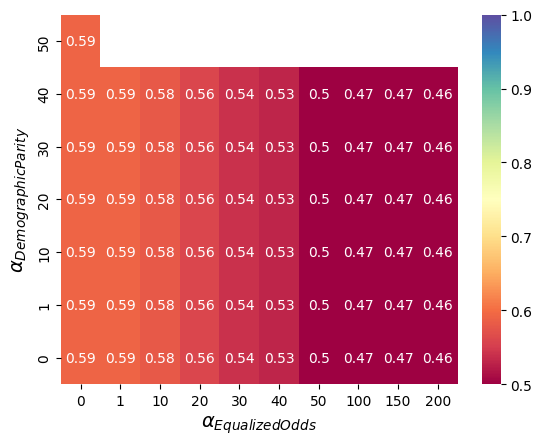

In [12]:
dfa_val_acc = dfa_val.pivot(index='alpha_dp',columns='alpha_eo',values='val_accuracy')
dfa_val_acc = dfa_val_acc.sort_values(by='alpha_dp',ascending=False).round(2)
sns.heatmap(dfa_val_acc,vmin=0.5,vmax=1,annot=True,cmap="Spectral")
plt.xlabel(r"$\alpha_{Equalized Odds}$",fontsize=14)
plt.ylabel(r"$\alpha_{Demographic Parity}$",fontsize=14)
#plt.title("Adult Validation Accuracy",fontsize=14)
plt.show()

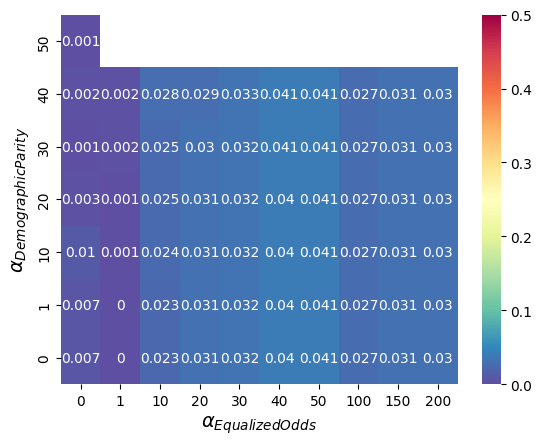

In [11]:
dfa_val_dpd = dfa_val.pivot(index='alpha_dp',columns='alpha_eo',values='val_dpd')
dfa_val_dpd = dfa_val_dpd.sort_values(by='alpha_dp',ascending=False).round(3)
sns.heatmap(dfa_val_dpd,vmin=0,vmax=0.5,annot=True,cmap="Spectral_r")
#plt.title("Adult Demographic Parity Gap",fontsize=14)
plt.xlabel(r"$\alpha_{Equalized Odds}$",fontsize=14)
plt.ylabel(r"$\alpha_{Demographic Parity}$",fontsize=14)
plt.show()

#min Loss + alpha(criterion)

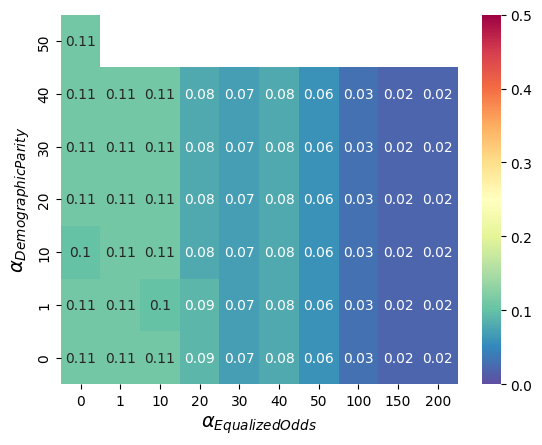

In [10]:
dfa_val_eod = dfa_val.pivot(index='alpha_dp',columns='alpha_eo',values='val_edd')
dfa_val_eod = dfa_val_eod.sort_values(by='alpha_dp',ascending=False).round(2)
sns.heatmap(dfa_val_eod,vmin=0,vmax=0.5,annot=True,cmap="Spectral_r")
#plt.title("Adult Equalized Odds Gap",fontsize=14)
plt.xlabel(r"$\alpha_{Equalized Odds}$",fontsize=14)
plt.ylabel(r"$\alpha_{Demographic Parity}$",fontsize=14)
plt.show()

## 3.0 Risk of Imbalanced Dataset

When a model only predicts in one class, then 
$\forall a \in A$ : 

$P(h(x) | A=a) = P(h(x)) = 0 $

Demographic parity will always be achieved when uniformly predicting a single class. 

Also $\forall a \in A, \forall y \in Y$ : 

$P(h(x) | A=a, Y=y) = P(h(x)) = 0 $

Equalized odds will always be achieved when uniformly predicting a single class. 

Thus, regularizing may only further incentivize the model to take this approach and predict uniformly.



In [ ]:
!pip install fairlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 KB 4.6 MB/s eta 0:00:00


In [ ]:
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio, demographic_parity_difference, equalized_odds_difference

def dpd(prediction, true, sensitive_features):
  return demographic_parity_difference(true,prediction, sensitive_features=sensitive_features)


def eod(prediction, true, sensitive_features):
  return equalized_odds_difference(true,prediction, sensitive_features=sensitive_features)

In [ ]:
h = np.ones(100)
y = np.random.rand(100) * 0.2
y = y.round()
a = np.zeros(100)
a[:50] = np.ones(50)

print ("Demographic Parity Difference", dpd(h,y,a))
print ("Equalized Odds Difference", eod(h,y,a))

Demographic Parity Difference 0.0
Equalized Odds Difference 0.0
